# WeatherPy
----

### *David Kloepper*
### *Data Visualization Bootcamp, Cohort 3*
### *April 6, 2019*

## Analysis of Results
* As expected, weather is warmer approaching 0 degrees latitude. Given the proximity to the equinox, when the sun is most directly over the equator, it is not surprising to see a balance in temperatures between the northern and sourthern hemispheres. 
* While not nearly as pronounced as with temperature, it does appear that cities near and just south of the equator have higher humidities overall, as compared to cities at greater latitudes. 
* There does not appear to be any relationship between the latitude of a city and the cloudiness or wind speed. It does appear that many cities with high percentages of cloudiness are also experiencing rain.

---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Set current date for charting
runTime = time.strftime("%m/%d/%Y", time.localtime())

# Output File (CSV)
output_data_file = "Outputs/citiesWeather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
latList = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngList = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(latList, lngList)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityName = city.city_name
    countryCode = city.country_code
    fullCity = cityName + "," + countryCode
    # If the city is unique, then add it to a our cities list
    if fullCity not in cities:
        cities.append(fullCity)

# Print the city count to confirm sufficient count
print(f"Initial number of cities: {len(cities)}")


Initial number of cities: 596


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#Set endpoint URL and the type of units to return from the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #imperial = Farhenheit

#Build api url including the API key and units type
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

#Set lists to hold cities, countries, and weather API results
cityWeather = []
cityList = []
countryList = []

#Set counters for number of searches and number of successes
searchCnt = 0
success = 0

print("Begin API Calls to OpenWeather.org")
print("---------------------------------------")

# Loop through the list of cities and perform request for data on each, printing the result
for fullCity in cities:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {fullCity}")   
    response = requests.get(query_url + fullCity).json()
    cityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {fullCity}    city id: {cityID}")
        cityWeather.append(response)
        citySplit = fullCity.split(",")
        cityList.append(citySplit[0])
        countryList.append(citySplit[1])
        success += 1
    else:
        print(f"     No weather record found for city: {fullCity}")
    time.sleep(.500)
          
print("---------------------------------------")
print("Data Retrieval Complete!")
print(f"Successfully retrieved weather data for {success} out of {searchCnt} cities!")

Begin API Calls to OpenWeather.org
---------------------------------------
Processing record 1 for the city: nizhniy kuranakh,ru
     Record found for city: nizhniy kuranakh,ru    city id: 2019135
Processing record 2 for the city: dhidhdhoo,mv
     Record found for city: dhidhdhoo,mv    city id: 1337612
Processing record 3 for the city: perevolotskiy,ru
     Record found for city: perevolotskiy,ru    city id: 511291
Processing record 4 for the city: acapulco,mx
     Record found for city: acapulco,mx    city id: 3533462
Processing record 5 for the city: talnakh,ru
     Record found for city: talnakh,ru    city id: 1490256
Processing record 6 for the city: robertsport,lr
     Record found for city: robertsport,lr    city id: 2274275
Processing record 7 for the city: kayes,ml
     Record found for city: kayes,ml    city id: 2455518
Processing record 8 for the city: new norfolk,au
     Record found for city: new norfolk,au    city id: 2155415
Processing record 9 for the city: bachaquero,v

Processing record 78 for the city: te anau,nz
     Record found for city: te anau,nz    city id: 2181625
Processing record 79 for the city: berlevag,no
     Record found for city: berlevag,no    city id: 780687
Processing record 80 for the city: santa cruz,cr
     Record found for city: santa cruz,cr    city id: 3621607
Processing record 81 for the city: bathsheba,bb
     Record found for city: bathsheba,bb    city id: 3374083
Processing record 82 for the city: gat,ly
     No weather record found for city: gat,ly
Processing record 83 for the city: san juan,us
     Record found for city: san juan,us    city id: 4726440
Processing record 84 for the city: bluff,nz
     Record found for city: bluff,nz    city id: 2206939
Processing record 85 for the city: tiksi,ru
     Record found for city: tiksi,ru    city id: 2015306
Processing record 86 for the city: jamestown,sh
     Record found for city: jamestown,sh    city id: 3370903
Processing record 87 for the city: longyearbyen,sj
     Record 

Processing record 155 for the city: ouagadougou,bf
     Record found for city: ouagadougou,bf    city id: 2357048
Processing record 156 for the city: burgeo,ca
     Record found for city: burgeo,ca    city id: 5911440
Processing record 157 for the city: kalmar,se
     Record found for city: kalmar,se    city id: 2702261
Processing record 158 for the city: shingu,jp
     Record found for city: shingu,jp    city id: 1847947
Processing record 159 for the city: amderma,ru
     No weather record found for city: amderma,ru
Processing record 160 for the city: isla mujeres,mx
     Record found for city: isla mujeres,mx    city id: 3526756
Processing record 161 for the city: beringovskiy,ru
     Record found for city: beringovskiy,ru    city id: 2126710
Processing record 162 for the city: faanui,pf
     Record found for city: faanui,pf    city id: 4034551
Processing record 163 for the city: werda,bw
     Record found for city: werda,bw    city id: 932960
Processing record 164 for the city: matt

Processing record 231 for the city: katsuura,jp
     Record found for city: katsuura,jp    city id: 1865309
Processing record 232 for the city: sungaipenuh,id
     Record found for city: sungaipenuh,id    city id: 1625929
Processing record 233 for the city: grindavik,is
     Record found for city: grindavik,is    city id: 3416888
Processing record 234 for the city: omaruru,na
     Record found for city: omaruru,na    city id: 3354540
Processing record 235 for the city: kruisfontein,za
     Record found for city: kruisfontein,za    city id: 986717
Processing record 236 for the city: impfondo,cg
     Record found for city: impfondo,cg    city id: 2259655
Processing record 237 for the city: kavieng,pg
     Record found for city: kavieng,pg    city id: 2094342
Processing record 238 for the city: saleaula,ws
     No weather record found for city: saleaula,ws
Processing record 239 for the city: hithadhoo,mv
     Record found for city: hithadhoo,mv    city id: 1282256
Processing record 240 fo

Processing record 308 for the city: wagar,sd
     Record found for city: wagar,sd    city id: 364027
Processing record 309 for the city: coquimbo,cl
     Record found for city: coquimbo,cl    city id: 3893629
Processing record 310 for the city: zhigansk,ru
     Record found for city: zhigansk,ru    city id: 2012530
Processing record 311 for the city: altay,cn
     Record found for city: altay,cn    city id: 1529651
Processing record 312 for the city: umm kaddadah,sd
     Record found for city: umm kaddadah,sd    city id: 364933
Processing record 313 for the city: igrim,ru
     Record found for city: igrim,ru    city id: 1505965
Processing record 314 for the city: alyangula,au
     Record found for city: alyangula,au    city id: 2079582
Processing record 315 for the city: ouegoa,nc
     Record found for city: ouegoa,nc    city id: 2139259
Processing record 316 for the city: vanimo,pg
     Record found for city: vanimo,pg    city id: 2084442
Processing record 317 for the city: tura,ru
  

Processing record 385 for the city: formosa,ar
     Record found for city: formosa,ar    city id: 3433899
Processing record 386 for the city: kalmunai,lk
     Record found for city: kalmunai,lk    city id: 1242110
Processing record 387 for the city: jiroft,ir
     No weather record found for city: jiroft,ir
Processing record 388 for the city: mangan,in
     Record found for city: mangan,in    city id: 1263776
Processing record 389 for the city: cimislia,md
     Record found for city: cimislia,md    city id: 618406
Processing record 390 for the city: jiddah,sa
     No weather record found for city: jiddah,sa
Processing record 391 for the city: noumea,nc
     Record found for city: noumea,nc    city id: 2139521
Processing record 392 for the city: esperance,au
     Record found for city: esperance,au    city id: 2071860
Processing record 393 for the city: sarahan,in
     Record found for city: sarahan,in    city id: 1257277
Processing record 394 for the city: ondorhaan,mn
     No weather 

Processing record 462 for the city: vestmannaeyjar,is
     Record found for city: vestmannaeyjar,is    city id: 3412093
Processing record 463 for the city: tevaitoa,pf
     Record found for city: tevaitoa,pf    city id: 4033375
Processing record 464 for the city: college,us
     Record found for city: college,us    city id: 5859699
Processing record 465 for the city: vao,nc
     Record found for city: vao,nc    city id: 2137773
Processing record 466 for the city: kasempa,zm
     Record found for city: kasempa,zm    city id: 912628
Processing record 467 for the city: skagastrond,is
     No weather record found for city: skagastrond,is
Processing record 468 for the city: muros,es
     Record found for city: muros,es    city id: 3115824
Processing record 469 for the city: mandalgovi,mn
     Record found for city: mandalgovi,mn    city id: 2030065
Processing record 470 for the city: port washington,us
     Record found for city: port washington,us    city id: 5267776
Processing record 471 

Processing record 539 for the city: bezhanitsy,ru
     Record found for city: bezhanitsy,ru    city id: 576572
Processing record 540 for the city: bhatkal,in
     Record found for city: bhatkal,in    city id: 1276067
Processing record 541 for the city: kampot,kh
     Record found for city: kampot,kh    city id: 1831112
Processing record 542 for the city: aflu,dz
     No weather record found for city: aflu,dz
Processing record 543 for the city: san antonio,ph
     Record found for city: san antonio,ph    city id: 1690315
Processing record 544 for the city: amos,ca
     Record found for city: amos,ca    city id: 5884588
Processing record 545 for the city: srandakan,id
     Record found for city: srandakan,id    city id: 1626493
Processing record 546 for the city: codrington,ag
     No weather record found for city: codrington,ag
Processing record 547 for the city: karsava,lv
     Record found for city: karsava,lv    city id: 458972
Processing record 548 for the city: port keats,au
     R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Use list comprehension to create lists for each of the relevant data elements from the API calls

lats = [result["coord"]["lat"] for result in cityWeather]
lngs = [result["coord"]["lon"] for result in cityWeather]
maxTemps = [result["main"]["temp"] for result in cityWeather]
humids = [result["main"]["humidity"] for result in cityWeather]
clouds =[result["clouds"]["all"] for result in cityWeather]
winds = [result["wind"]["speed"] for result in cityWeather]
dates = [result["dt"] for result in cityWeather]
weatherStates = [result["weather"][0]["main"] for result in cityWeather]


#Print the count from each list
print (f"City       {len(cityList)}")
print (f"Cloudiness {len(clouds)}")
print (f"Country    {len(countryList)}")
print (f"Date       {len(dates)}")
print (f"Humidity   {len(humids)}")
print (f"Lat        {len(lats)}")
print (f"Long       {len(lngs)}")
print (f"Max Temp   {len(maxTemps)}")
print (f"Wind Speed {len(winds)}")
print (f"Weather    {len(weatherStates)}")

City       512
Cloudiness 512
Country    512
Date       512
Humidity   512
Lat        512
Long       512
Max Temp   512
Wind Speed 512
Weather    512


In [5]:
#Put the lists of cities and weather together into a dataframe
weatherDataMessy = pd.DataFrame({"City":cityList,
                             "Cloudiness":clouds,
                            "Country":countryList,
                             "Date":dates,
                             "Humidity":humids,
                            "Lat":lats,
                            "Lng":lngs,
                            "Max Temp":maxTemps,
                            "Wind Speed":winds,
                           "Weather":weatherStates})

#Remove any extreme outliers for humidity over 100%
weatherDataMessy = weatherDataMessy[~(weatherDataMessy['Humidity'] > 100)]  

#Remove any extreme outliers for cloudiness over 100%
weatherData = weatherDataMessy[~(weatherDataMessy['Cloudiness'] > 100)] 

#Export the dataframe to a CSV file
weatherData.to_csv(output_data_file, encoding='utf-8')

#Print rows of the dataframe
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Weather
0,nizhniy kuranakh,92,ru,1554567665,69,58.84,125.49,27.44,3.74,Clouds
1,dhidhdhoo,0,mv,1554567666,100,6.88,73.10,84.95,6.08,Clear
2,perevolotskiy,64,ru,1554567606,74,51.88,54.19,49.85,8.99,Clouds
3,acapulco,20,mx,1554562020,69,16.86,-99.88,80.60,2.24,Clouds
4,talnakh,76,ru,1554567668,84,69.49,88.39,19.97,6.64,Clouds


In [11]:
#For a fun extra element, the current weather status is included in the dataframe and dots on the scatter plot
#will be colored accordingly to see if any additional trends can be identified in the plots

#Randomly mix-up the weather dataframe
weatherData = weatherData.sample(frac=1).reset_index(drop=True)

#Set colors that will be used on plots, based on the weather condition groups. Any value not specified is considered "Other"
col = np.where(weatherData["Weather"]=="Thunderstorm",'crimson',
               np.where(weatherData["Weather"]=="Drizzle",'limegreen',
                        np.where(weatherData["Weather"]=="Rain",'darkgreen',
                                 np.where(weatherData["Weather"]=="Snow",'violet',
                                          np.where(weatherData["Weather"]=="Clear",'skyblue',
                                                   np.where(weatherData["Weather"]=="Clouds",'darkgrey','tan'))))))

#Manually set fake plots that can be referenced when building a legend for the scatter plot
legThunder = plt.Line2D([0,0],[0,1], color='crimson', marker='o', linestyle='')
legRain = plt.Line2D([0,0],[0,1], color='darkgreen', marker='o', linestyle='')
legClear = plt.Line2D([0,0],[0,1], color='skyblue', marker='o', linestyle='')
legDrizzle = plt.Line2D([0,0],[0,1], color='limegreen', marker='o', linestyle='')
legSnow = plt.Line2D([0,0],[0,1], color='violet', marker='o', linestyle='')
legClouds = plt.Line2D([0,0],[0,1], color='darkgrey', marker='o', linestyle='')
legOther = plt.Line2D([0,0],[0,1], color='tan', marker='o', linestyle='')

#List the unique weather condition groups present in the data
weatherData["Weather"].unique()

array(['Clouds', 'Clear', 'Rain', 'Thunderstorm', 'Mist', 'Haze',
       'Drizzle', 'Snow'], dtype=object)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

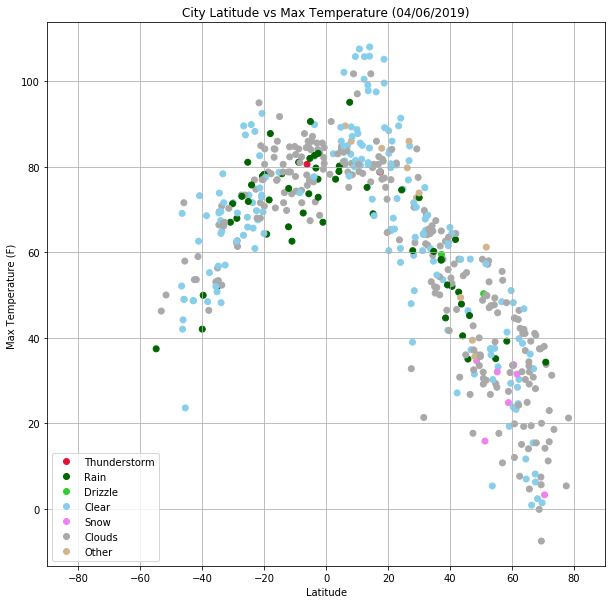

In [12]:
# Latitude vs Max Temp

#Set larger figure size
plt.figure(figsize=(10,10))

plt.scatter(weatherData["Lat"], weatherData["Max Temp"], color=col, marker='o')

# Add chart labels
plt.title(f"City Latitude vs Max Temperature ({runTime})")
plt.ylabel("Max Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_MaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

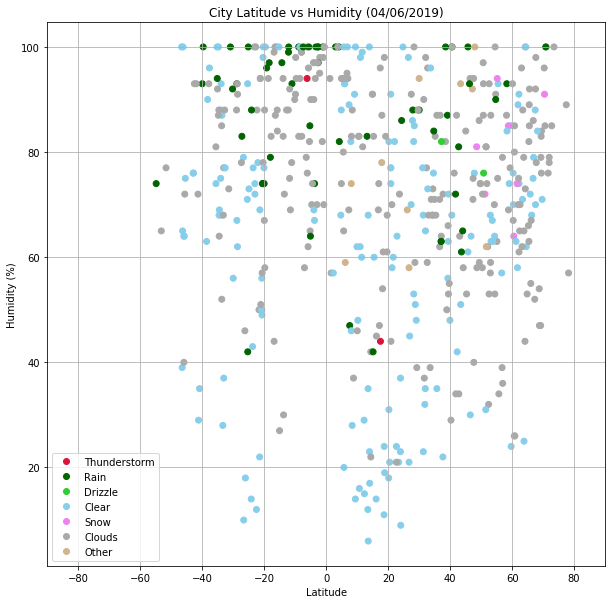

In [13]:
# Latitude vs Humidity
plt.figure(figsize=(10,10))

plt.scatter(weatherData["Lat"], weatherData["Humidity"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Humidity ({runTime})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

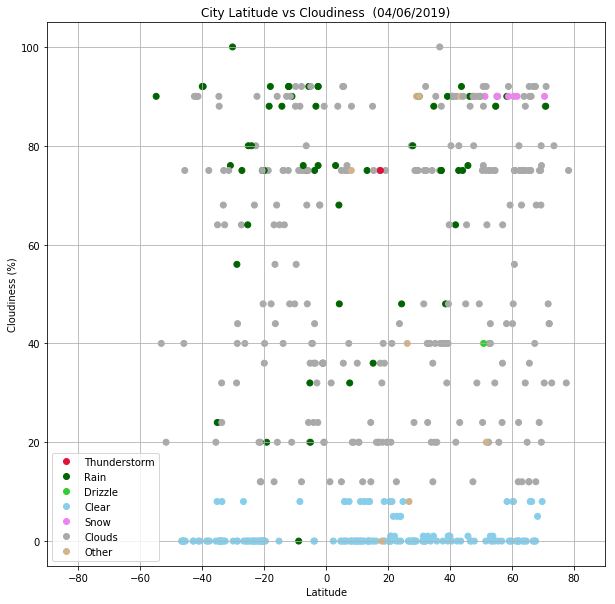

In [14]:
# Latitude vs Cloudiness
plt.figure(figsize=(10,10))
plt.scatter(weatherData["Lat"], weatherData["Cloudiness"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Cloudiness  ({runTime})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

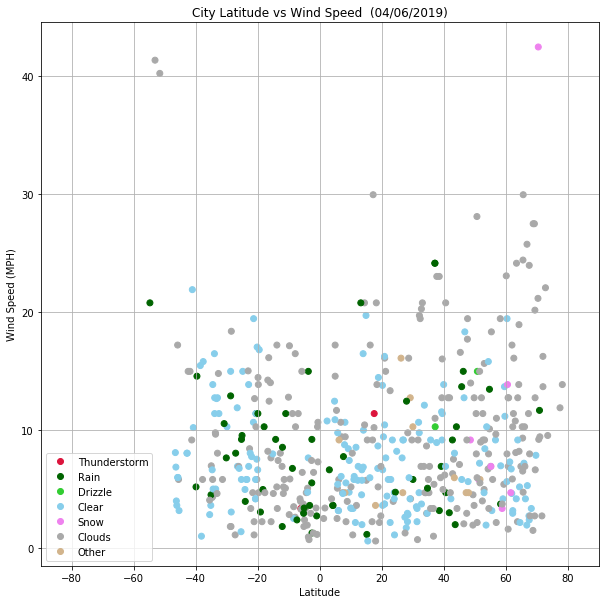

In [15]:
# Latitude vs Wind Speed
plt.figure(figsize=(10,10))
plt.scatter(weatherData["Lat"], weatherData["Wind Speed"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Wind Speed  ({runTime})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_WindSpeed.png")
# Show plot
plt.show()

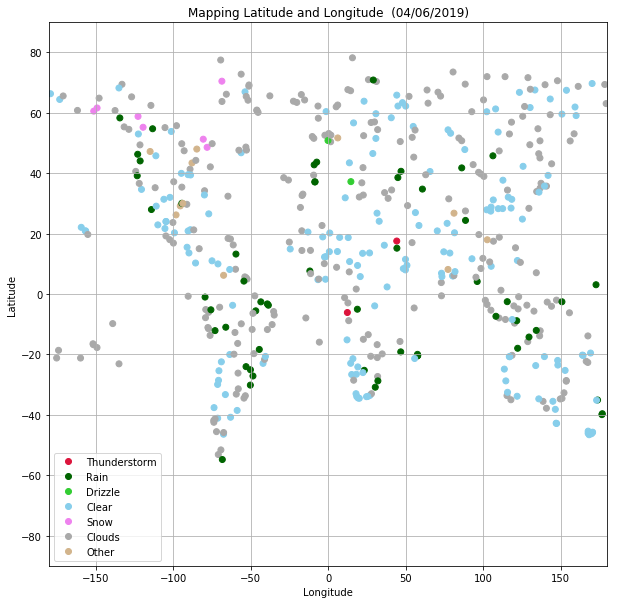

In [22]:
#Plotting Latitude and Longitude to see the locations included, just for fun!
plt.figure(figsize=(10,10))
plt.scatter(weatherData["Lng"], weatherData["Lat"], color=col, marker="o")

# Add chart labels
plt.title(f"Mapping Latitude and Longitude  ({runTime})")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim(-180,180)
plt.ylim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/LatitudeLongitude.png")
# Show plot
plt.show()